# Airline Satisfaction Prediction Project

## Overview

Welcome to the Airline Satisfaction Prediction Project! This project aims to analyze and predict customer satisfaction with airlines based on a dataset available on Kaggle. We will perform data cleaning, exploratory data analysis (EDA) using Plotly, build predictive models using KNN, Random Forest, and Logistic Regression, and showcase our results through a Streamlit app.

## Dataset

The dataset used in this project is the "Airline Passenger Satisfaction" dataset, which can be downloaded from Kaggle [here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data). **For this project, we will specifically use the `train.csv` file.** The dataset contains information about airline passengers, including features such as flight distance, seat comfort, inflight entertainment, and more.

## Task
In this project, our primary task is to read the **`train.csv`** file from the airline satisfaction dataset into a Jupyter Notebook that you will create. Begin by performing essential data cleaning tasks to ensure the dataset is ready for analysis. Utilize Plotly for initial exploratory data analysis (EDA), creating interactive visualizations to gain insights into the dataset. Subsequently, employ machine learning techniques, including K-Nearest Neighbors (KNN), Logistic Regression, and Random Forest, to build predictive models. Evaluate and compare the performance of these models to determine their effectiveness in predicting airline satisfaction—don't forget to compare to a baseline model! Lastly, we will present our findings in a Streamlit app, providing an interactive and user-friendly platform to showcase the results of our analysis and model performance.

Happy coding, and good luck! ✈️📊🤖


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Load the Airline Satisfaction Dataset

In [3]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/8 - Machine Learning Classification/Coding-Temple-M8-Project-Airline-Satisfaction-Predictions/data/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Drop 'Unnamed: 0' and 'id' columns
df.drop(columns=['Unnamed: 0','id'], inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Let's map the categorical features to numeric...

In [6]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})
df['Class'] = df['Class'].map({'Business': 0, 'Eco': 1, 'Eco Plus': 2})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
df.isna().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


Replace missing `Arrival Delay in Minutes` values with mean value

In [9]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

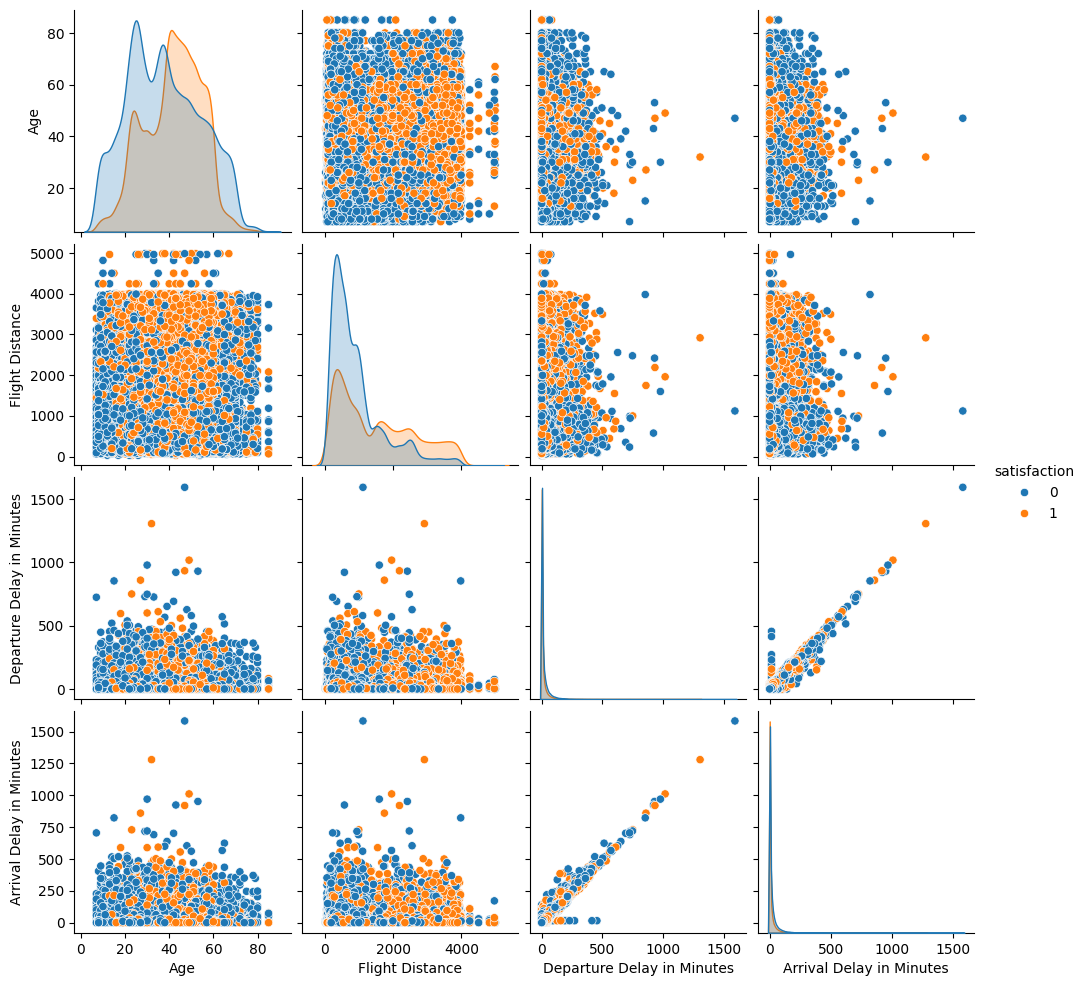

In [10]:
# Select columns for the pairplot
selected_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Create the pairplot
sns.pairplot(df, vars = selected_columns, hue = 'satisfaction')
plt.show()


#### Feature Correlation with `satisfaction` target

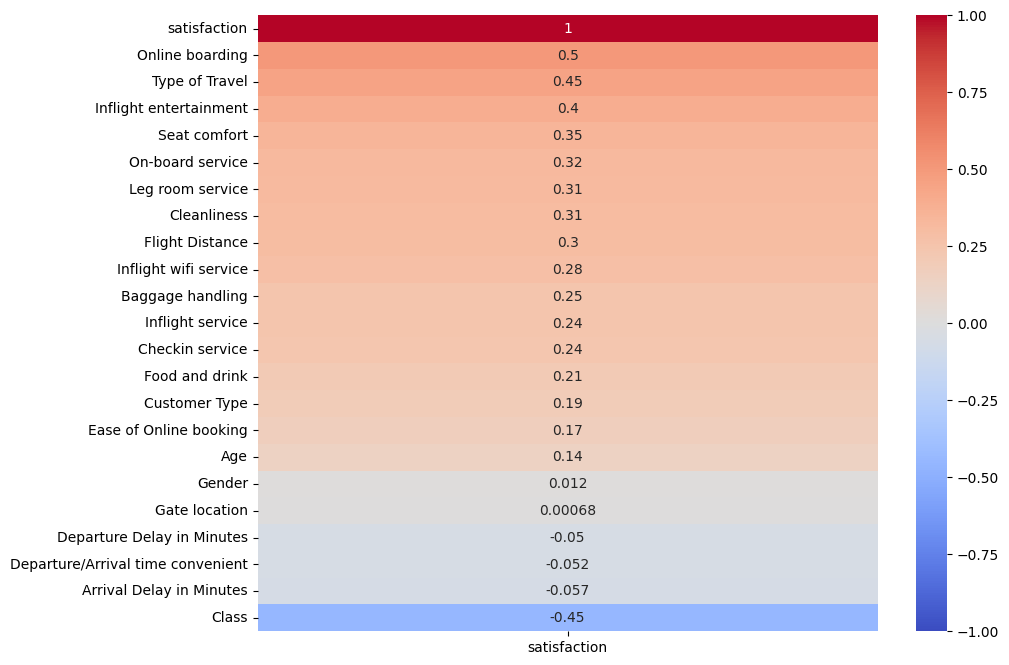

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only=True)[['satisfaction']].sort_values(by='satisfaction', ascending = False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);

Now that our data is clean and we've explored its characteristics, it's time to build and evaluate your models.

- **Establish baseline accuracy score:** Before training any models, establish a baseline accuracy score. This provides a benchmark for evaluating the performance of our models.

- **Train-test-split with `random_state = 42`:** Split our data into training and testing sets using `train_test_split` with a specified random state. This ensures reproducibility in our results.

- **Normalize our data with `StandardScaler`:** Standardize our features using `StandardScaler` to ensure that they are on a similar scale. This step is particularly important for algorithms sensitive to the scale of input features, such as K-Nearest Neighbors.

- **Evaluate K-Nearest Neighbors (KNN):**
  - Set \( k = 5 \) and calculate the training/testing accuracy scores. Explore whether the model performs better with other values of \( k \). <br>
<br>
- **Try Logistic Regression and RandomForestClassifier:**
  - Experiment with alternative models such as Logistic Regression and RandomForestClassifier. Compare their performance against the KNN model to identify the most suitable algorithm for your specific classification task.
<br>
  - For each model, include a confusion matrix to assess its performance in terms of true positives, true negatives, false positives, and false negatives.

#### Establish a baseline....our model has to beat an accuracy of $56.6\%$.

In [12]:
df['satisfaction'].value_counts(normalize=True)

,proportion
satisfaction,
0,0.566667
1,0.433333


Determine the $X$ and $y$ datasets.

In [13]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

Establish train and test datasets.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

Normalize the data using `StandardScaler()`

In [15]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Instantiate KNN, then fit and evaluate the model.

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [17]:
knn.score(X_train_sc, y_train)

0.9480546145159634

In [18]:
knn.score(X_test_sc, y_test)

0.9273560209424084

The model does do much better than the baseline.  Let's create a confusion matrix.

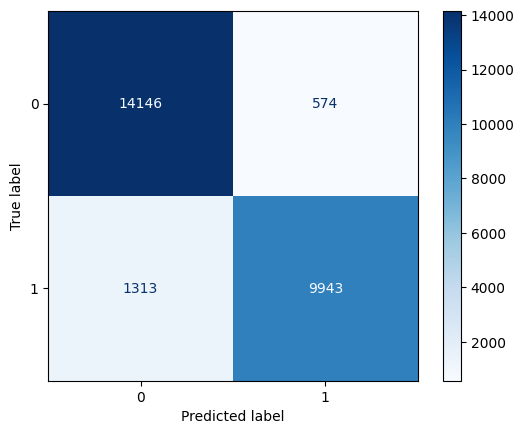

In [19]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap='Blues');

Let's try different values of $k$ to see how the model performs.

In [20]:
# Create empty list for scores
scores = []

for k in range(3, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})
df_scores = pd.DataFrame(scores)
df_scores

,k,train_score,test_score
0,3,0.958179,0.925316
1,5,0.948055,0.927356
2,7,0.943461,0.926163
3,9,0.939945,0.927164
4,11,0.937635,0.926702
5,13,0.936582,0.927087
6,15,0.935184,0.926394
7,17,0.934042,0.926047
8,19,0.932925,0.925162
9,21,0.931950,0.926009


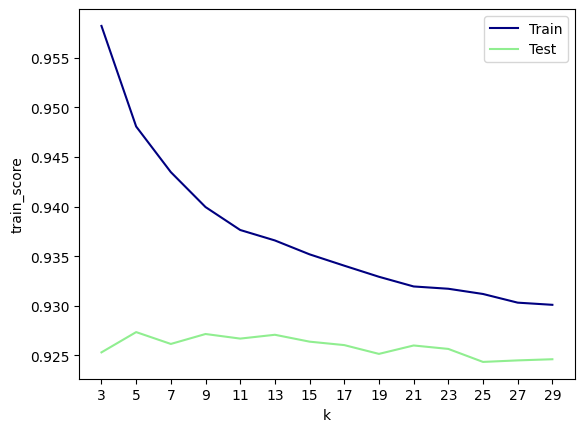

In [21]:
sns.lineplot(data = df_scores, x = 'k', y = 'train_score', c='navy', label='Train');
sns.lineplot(data = df_scores, x = 'k', y = 'test_score', c ='lightgreen', label='Test');
plt.xticks(np.arange(3, 31, 2));

## Now, let's try Logistic Regression

In [22]:
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=10000)

In [23]:
logr.score(X_train_sc, y_train)

0.8753079765937789

In [24]:
logr.score(X_test_sc, y_test)

0.8762319063751155

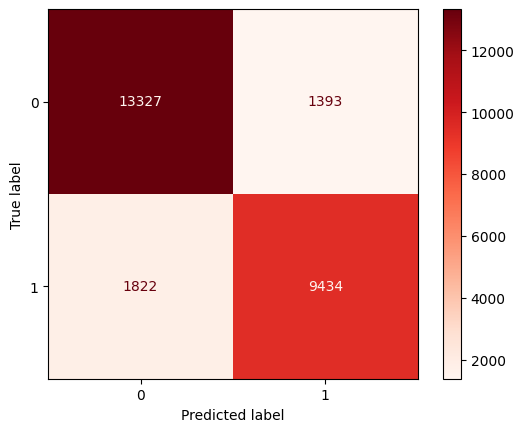

In [25]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

## Let's try `RandomForest()`

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [27]:
rf.score(X_train_sc, y_train)

1.0

In [28]:
rf.score(X_test_sc, y_test)

0.9611179550354173

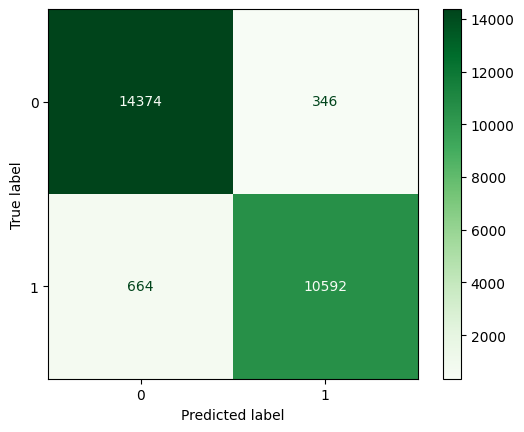

In [29]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Greens');

Without any model tweaking, it looks like Random Forest is the best model choice.